In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(churn_df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [5]:
print(churn_df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
print(churn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(churn_df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
churn_df = churn_df .drop('customerID', axis=1)

In [9]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
X = pd.get_dummies(churn_df.drop('Churn', axis=1))
y = churn_df['Churn']
rf.fit(X, y)

importance = rf.feature_importances_
important_features = X.columns[importance > 0.01]
X = X[important_features]

In [ ]:
important_features = X.columns[importance > 0.01]
X = X[important_features]

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = churn_df.drop('Churn', axis=1).apply(le.fit_transform)
y = churn_df['Churn']
rf.fit(X, y)

RandomForestClassifier()

In [ ]:
RandomForestClassifier()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
churn_df['gender'] = le.fit_transform(churn_df['gender'])

In [14]:
churn_df = pd.get_dummies(churn_df, columns=['PhoneService'])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

print('Accuracy:', logreg.score(X_valid, y_valid))

Accuracy: 0.8111689540937056


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best params:', grid.best_params_)
print('Best score:', grid.best_score_)

Best params: {'C': 0.1}
Best score: 0.8018255578093306


In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [19]:
from datetime import datetime
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')
churn_df['avg_monthly_charges'] = churn_df['TotalCharges'] / churn_df['tenure']

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [24]:
rfe = RFE(estimator=logreg, n_features_to_select=10)

In [25]:
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)

In [26]:
print(rfe.support_)

[False  True  True  True False  True False False  True  True False  True
  True False  True  True False False False]


In [27]:
X_rfe = X[X.columns[rfe.support_]]

In [28]:
logreg.fit(X_rfe, y)
X_valid_rfe = X_valid[X.columns[rfe.support_]]
print('New accuracy:', logreg.score(X_valid_rfe, y_valid))

New accuracy: 0.7709417889256981


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
rf = RandomForestClassifier(n_estimators=100)
le = LabelEncoder()
X = churn_df.drop('Churn', axis=1).apply(le.fit_transform)
y = churn_df['Churn'].map({'Yes': 1, 'No': 0})
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
RandomForestClassifier()

RandomForestClassifier()

In [32]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 2.6/150.0 MB 5.8 MB/s eta 0:00:26
   - -------------------------------------- 4.2/150.0 MB 6.4 MB/s eta 0:00:23
   - -------------------------------------- 5.8/150.0 MB 6.8 MB/s eta 0:00:22
   - -------------------------------------- 7.3/150.0 MB 7.0 MB/s eta 0:00:21
   -- ------------------------------------- 8.9/150.0 MB 6.9 MB/s eta 0:00:21
   -- ------------------------------------- 10.2/150.0 MB 6.9 MB/s eta 0:00:21
   --- ------------------------------------ 11.5/150.0 MB 6.8 MB/s eta 0:00:21
   --- ------------------------------------ 13.1/150.0 MB 7.0 MB/s eta 0:00:20
   --- ------------------------------------ 14.4/150.0 MB 6.7 MB/s eta 0:00:21
   ---- ----------------------------------- 16.0/150.0 MB 6.8 MB/s eta 0:0

In [33]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [34]:
rf_probs = rf.predict_proba(X_valid)[:,1]
xgb_probs = xgb.predict_proba(X_valid)[:,1]
ensemble_probs = 0.4*rf_probs + 0.6*xgb_probs
ensemble_preds = ensemble_probs > 0.5

In [35]:
blender = LogisticRegression(max_iter=10000)
rf_probs_train = rf.predict_proba(X_train)[:,1]
xgb_probs_train = xgb.predict_proba(X_train)[:,1]
stack_X_train = np.c_[rf_probs_train, xgb_probs_train]
blender.fit(stack_X_train, y_train)

LogisticRegression(max_iter=10000)

In [36]:
LogisticRegression(max_iter=10000)

LogisticRegression(max_iter=10000)

In [37]:
from sklearn.model_selection import cross_validate
scores = cross_validate(blender, X, y, cv=5, scoring='accuracy')
print(scores['test_score'].mean())

0.8051973111168463


In [38]:
print(xgb.feature_importances_)

[0.01849517 0.02315111 0.01848999 0.02223233 0.03151728 0.02355443
 0.08679608 0.11590414 0.02491794 0.01846238 0.03336863 0.01638546
 0.03276753 0.36858746 0.02532543 0.02179561 0.02444916 0.02638876
 0.0418735  0.         0.02553762]


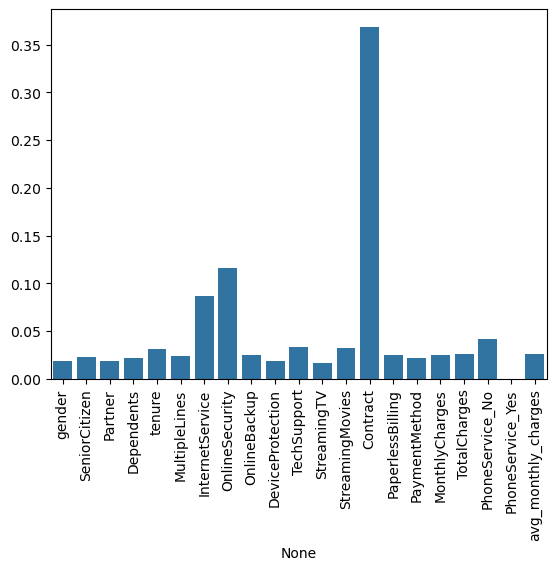

In [39]:
sns.barplot(x=X_train.columns, y=xgb.feature_importances_)
plt.xticks(rotation=90);

In [40]:
!pip install shap

In [41]:
print(blender.coef_)
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_valid)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_valid.iloc[0,:])

[[12.49037946  2.9104546 ]]


In [42]:
import pickle
pickle.dump(blender, open('churn_model.pkl', 'wb'))